In [1]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!ls drive


MyDrive


In [16]:
data = pd.read_csv('/content/drive/MyDrive/DeepLearning/DatasetBuilding/PSN_Dataset_06-12.csv')
data = data.drop(columns=["SHA1", "MD5", "SHA256"])

mapping_label = {
    "benign": 0
}

def maping(label):
  return mapping_label.get(label, 1)

data["Label"] = data['Label'].apply(maping)

data.value_counts("Label")


Label
0    1543
1    1467
dtype: int64

1
2
3
4
Model: RF
Accuracy: 92.58028792912513
Recall: 89.70917225950782
Precision: 95.02369668246445
F1: 92.28998849252014
AUC-ROC: 92.55195455080654
Training Time: 1.1476423740386963
Confusion Matrix:
[[435  21]
 [ 46 401]]
Model: SVM
Accuracy: 91.25138427464009
Recall: 92.39373601789708
Precision: 90.17467248908298
F1: 91.2707182320442
AUC-ROC: 91.26265748263276
Training Time: 0.2335214614868164
Confusion Matrix:
[[411  45]
 [ 34 413]]
Model: DT
Accuracy: 89.81173864894795
Recall: 89.70917225950782
Precision: 89.70917225950782
F1: 89.70917225950782
AUC-ROC: 89.8107264806311
Training Time: 0.23757123947143555
Confusion Matrix:
[[410  46]
 [ 46 401]]
Model: kNN
Accuracy: 88.15060908084163
Recall: 86.57718120805369
Precision: 89.17050691244239
F1: 87.85471055618615
AUC-ROC: 88.13508183209701
Training Time: 0.001905679702758789
Confusion Matrix:
[[409  47]
 [ 60 387]]


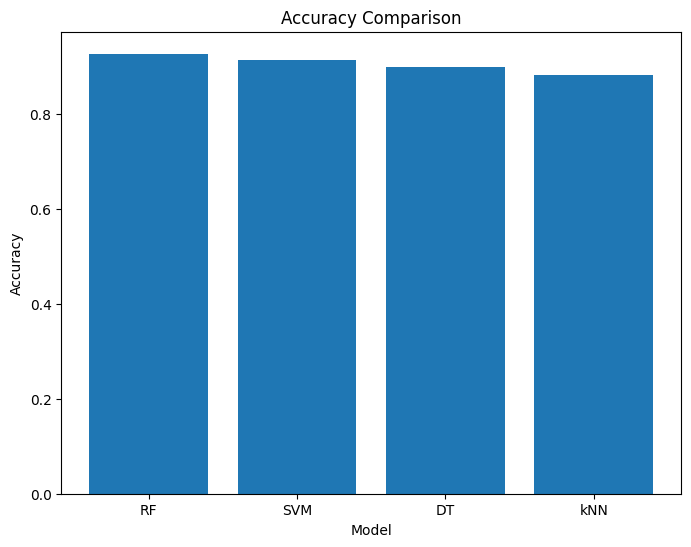

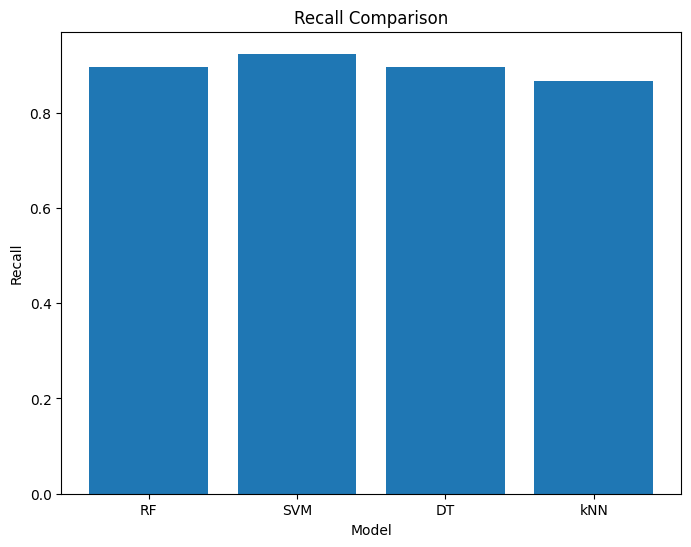

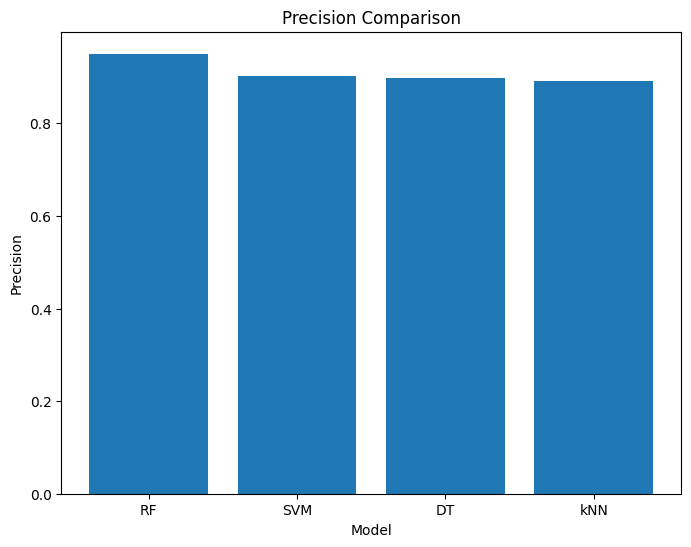

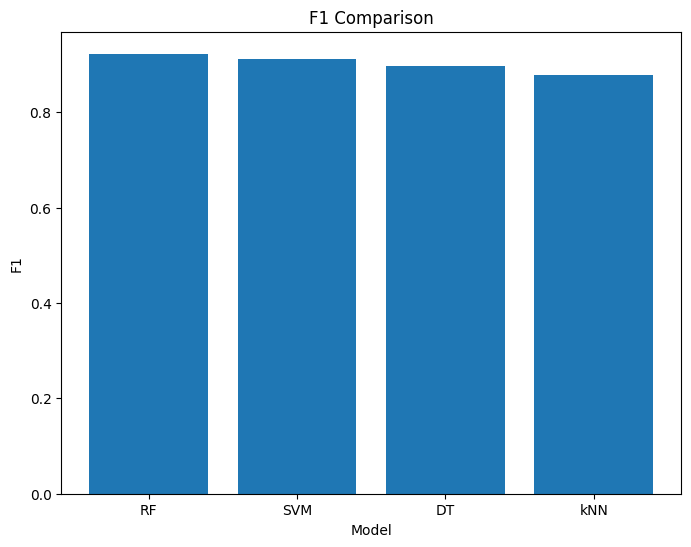

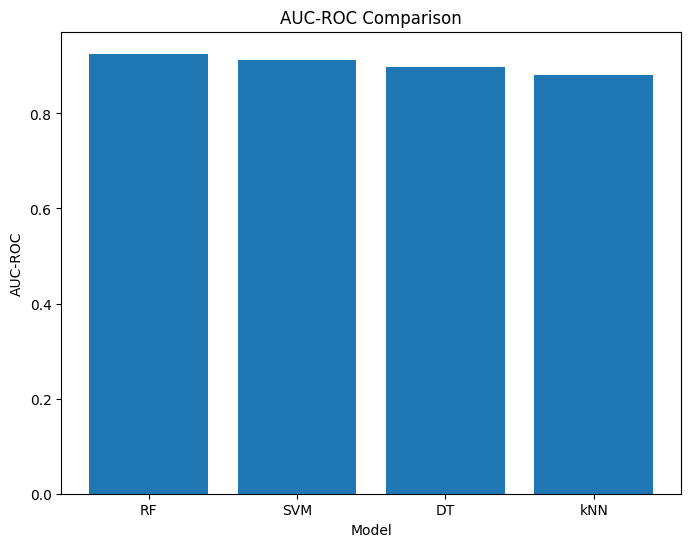

In [18]:
# Chia dữ liệu thành features và labels
X = data.drop(columns=['Label']).values
y = data['Label'].values

# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Huấn luyện và đánh giá các mô hình
models = {
    'RF': RandomForestClassifier(),
    'SVM': SVC(),
    'DT': DecisionTreeClassifier(),
    'kNN': KNeighborsClassifier()
}

results = []
count = 1

for name, model in models.items():
    print(count)
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1': f1,
        'AUC-ROC': auc_roc,
        'Training Time': training_time,
        'Confusion Matrix': cm
    })

    count += 1

# Hiển thị kết quả đánh giá
for result in results:
    print("Model:", result['Model'])
    print("Accuracy:", result['Accuracy'] * 100)
    print("Recall:", result['Recall'] * 100)
    print("Precision:", result['Precision'] * 100)
    print("F1:", result['F1'] * 100)
    print("AUC-ROC:", result['AUC-ROC'] * 100)
    print("Training Time:", result['Training Time'])
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("="*50)

# Vẽ biểu đồ trực quan
metrics = ['Accuracy', 'Recall', 'Precision', 'F1', 'AUC-ROC']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    plt.bar([result['Model'] for result in results], [result[metric] for result in results])
    plt.title(f'{metric} Comparison')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.show()
